# Stock Market Analysis Project (Burakhan Sinal)
#That is a very basic analysis but you can just change stock market name and make an analysise
# quantitative trading techniques and platforms.
https://www.linkedin.com/in/burakhan-sinal/
We'll be analyzing stock data related to a few car companies, from Jan 1 2012 to Jan 1 2017.Connect yahoo finance Keep in mind that this project is mainly just to practice your skills with matplotlib, pandas, and numpy. Don't infer financial trading advice from the analysis we do here!

### Part 0: Import

** Import the various libraries you will need-you can always just come back up here or import as you go along :) **

In [8]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import matplotlib. pyplot as plt 
import yfinance as yf # connection yahoo finance  python3 -m pip install yfinance
yf.pdr_override() # <== that's all it takes :-)
from pandas_datareader import data as pdr



____
## Part 1: Getting the Data yahoo finance 

### Tesla Stock (Ticker: TSLA on the NASDAQ)

**  *Note! Not everyone will be working on a computer that will give them open access to download the stock information using pandas_datareader (firewalls, admin permissions, etc...). 





In [9]:
#Get yahoo finance Tesla data its take more than 10s dont worry :)
tesla = pdr.get_data_yahoo('TSLA', start='2023-1-1')

[*********************100%%**********************]  1 of 1 completed


In [10]:
tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800
2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000
2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300
2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220911100
2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000
...,...,...,...,...,...,...
2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800
2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400
2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400


In [11]:
#GM Data
gm = pdr.get_data_yahoo('GM', start='2023-1-1')

[*********************100%%**********************]  1 of 1 completed


In [12]:
#Ford Data
ford = pdr.get_data_yahoo('F', start='2023-1-1')

[*********************100%%**********************]  1 of 1 completed


In [13]:
ford
gm.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,34.020000,34.340000,33.400002,33.820000,33.461426,11793300
2023-01-04,34.290001,34.950001,34.090000,34.689999,34.322197,11326300
2023-01-05,34.200001,35.439999,34.119999,35.000000,34.628910,11932000
2023-01-06,34.689999,36.009998,34.549999,35.910000,35.529266,9783500
2023-01-09,36.529999,36.840000,35.849998,35.919998,35.539158,11617900


## Part 2: Visualizing the Data

** Time to visualize the data. **

** Follow along and recreate the plots below according to the instructions and explanations. **

____

** Recreate this linear plot of all the stocks' Open price ! Hint: For the legend, use label parameter and plt.legend()**

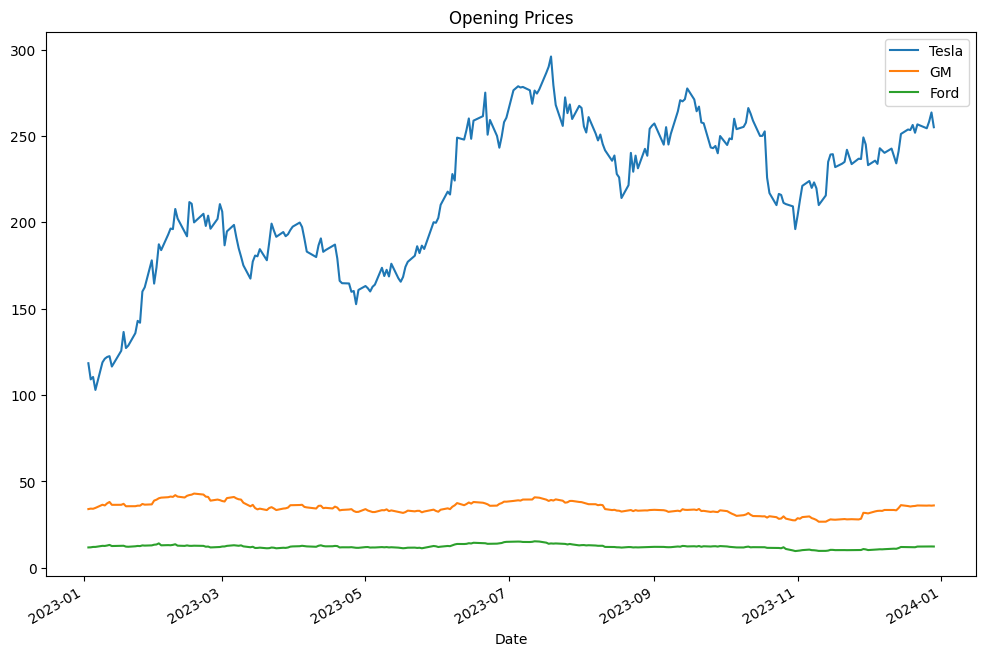

In [14]:
tesla["Open"].plot(label="Tesla",figsize=(12,8),title='Opening Prices')
gm["Open"].plot(label="GM")
ford["Open"].plot(label="Ford")
plt.legend();

____

** Plot the Volume of stock traded each day.**

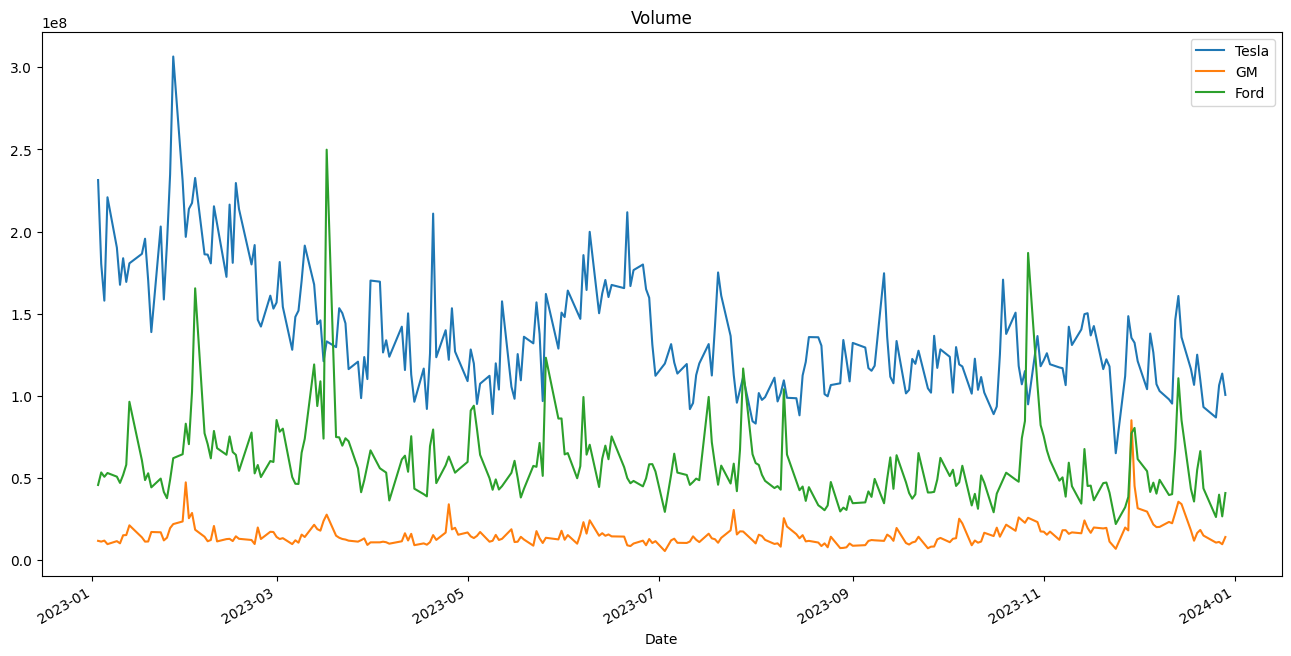

In [15]:
tesla['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume')
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')
plt.legend();

In [16]:
ford['Volume'].argmax()

51

____

** Create a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.**

In [17]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']

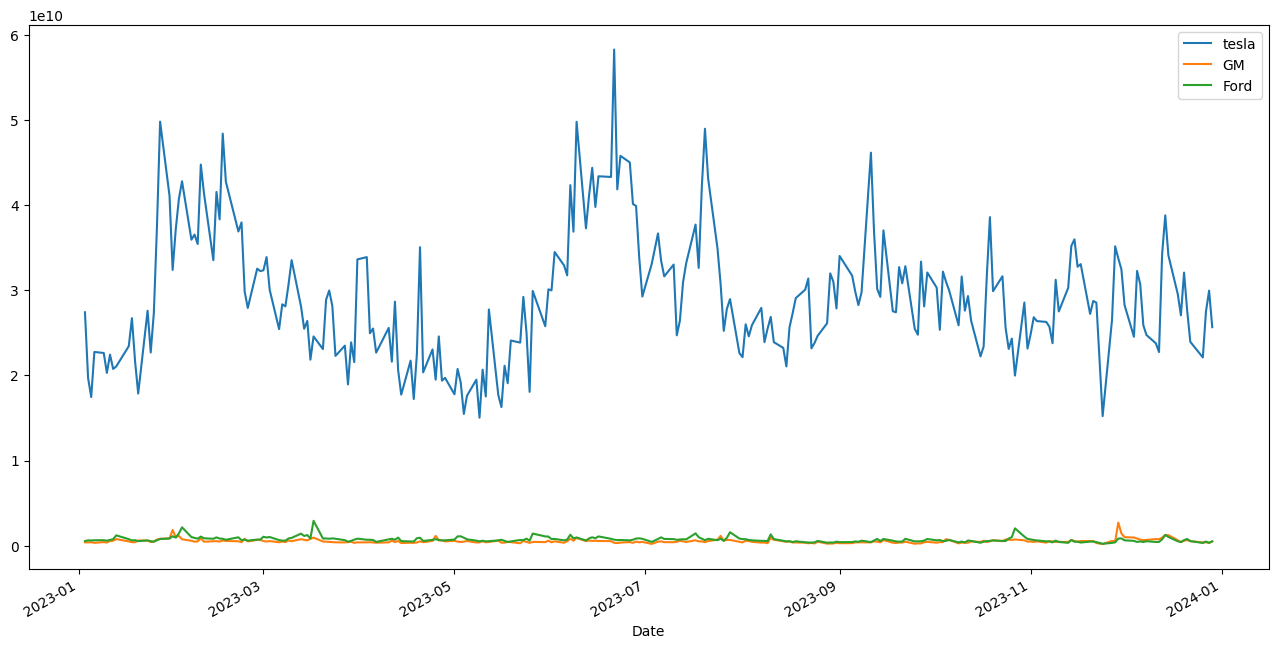

In [18]:
tesla['Total Traded'].plot(label="tesla",figsize=(16,8))
gm['Total Traded'].plot(label="GM")
ford['Total Traded'].plot(label="Ford")
plt.legend();

** Plot this "Total Traded" against the time index.**

____

** Let's practice plotting out some MA (Moving Averages). Plot out the MA50 and MA200 for GM. **

<Axes: xlabel='Date'>

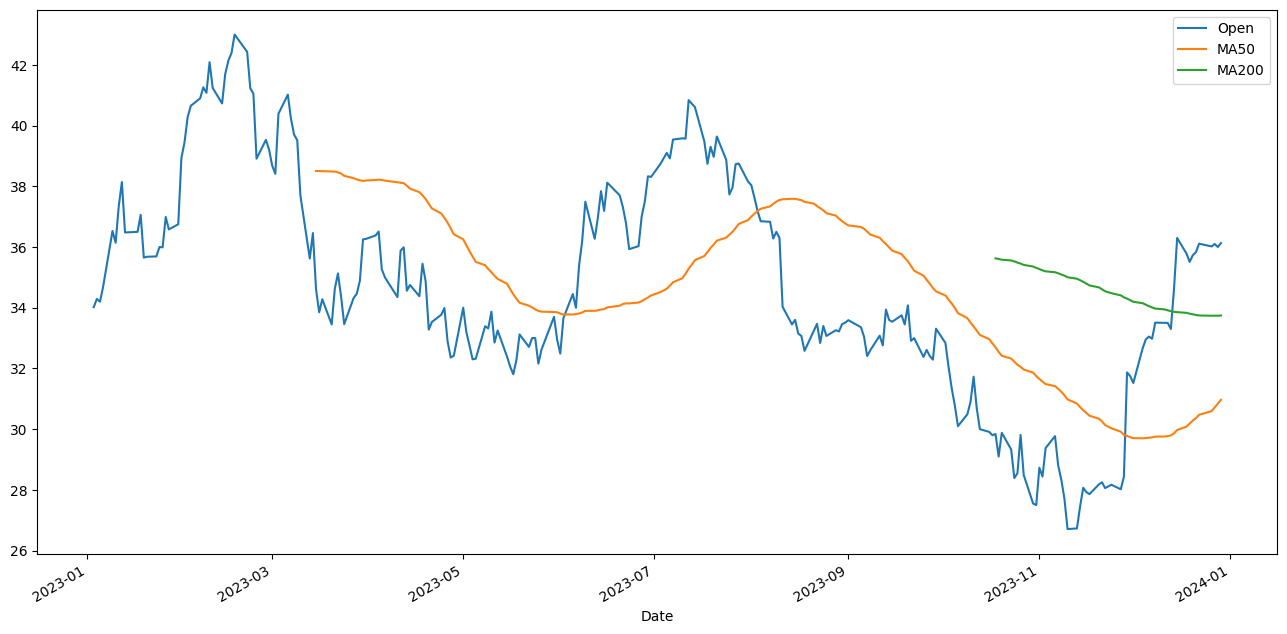

In [19]:
gm["MA50"]= gm["Open"].rolling(50).mean()
gm["MA200"]= gm["Open"].rolling(200).mean()
gm[["Open","MA50","MA200"]].plot(figsize=(16,8))

______

** Finally lets see if there is a relationship between these stocks, after all, they are all related to the car industry. We can see this easily through a scatter matrix plot. Import scatter_matrix from pandas.plotting and use it to create a scatter matrix plot of all the stocks'opening price. You may need to rearrange the columns into a new single dataframe. Hints and info can be found here: https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot **

In [20]:
from pandas.plotting import scatter_matrix

In [21]:
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)

In [22]:
car_comp.head()

,Open,Open,Open
Date,,,
2023-01-03,118.470001,34.020000,11.82
2023-01-04,109.110001,34.290001,11.88
2023-01-05,110.510002,34.200001,12.11
2023-01-06,103.000000,34.689999,12.12
2023-01-09,118.959999,36.529999,12.74


In [23]:
car_comp.columns = ['Tesla Open','GM Open','Ford Open']

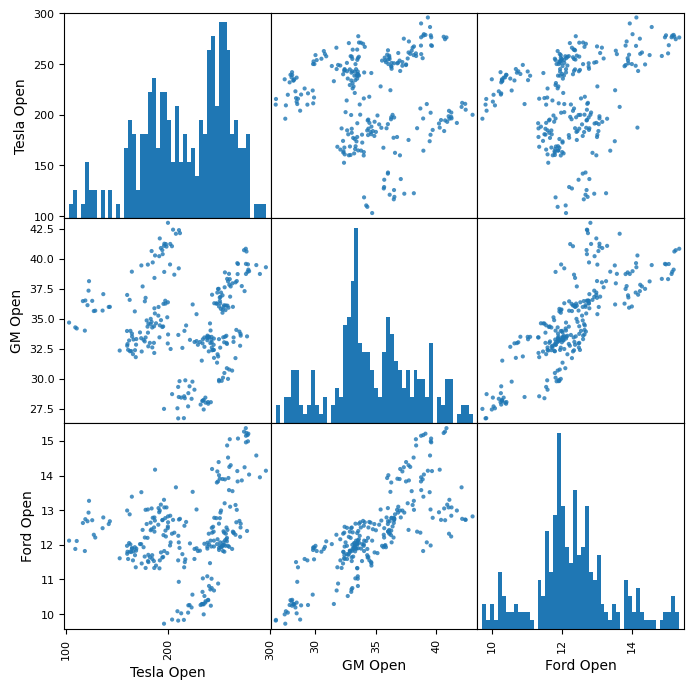

In [24]:
# You can use a semi-colon to remove the axes print outs
scatter_matrix(car_comp,figsize=(8,8),alpha=0.8,hist_kwds={'bins':50});

____
# Part 3: Basic Financial Analysis

Now it is time to focus on a few key financial calculations. This will serve as your transition to the second half of the course. All you need to do is follow along with the instructions, this will mainly be an exercise in converting a mathematical equation or concept into code using python and pandas, something we will do often when working with quantiative data! If you feel very lost in this section, don't worry! Just go to the solutions lecture and treat it as a code-along lecture, use whatever style of learning works best for you!

Let's begin!
____

## Daily Percentage Change
First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:

$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

** Create a new column for each dataframe called returns. This column will be calculated from the Close price column. There are two ways to do this, either a simple calculation using the .shift() method that follows the formula above, or you can also use pandas' built in pct_change method. **

In [25]:
# Method 1: Using shift
tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1) ) - 1

In [26]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,returns
Date,,,,,,,,
2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800,2.741429e+10,NaN
2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000,1.968224e+10,0.051249
2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300,1.745907e+10,-0.029039
2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220911100,2.275384e+10,0.024651
2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000,2.263618e+10,0.059349


In [27]:
tesla['returns'] = tesla['Close'].pct_change(1)

In [28]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,returns
Date,,,,,,,,
2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800,2.741429e+10,NaN
2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000,1.968224e+10,0.051249
2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300,1.745907e+10,-0.029039
2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220911100,2.275384e+10,0.024651
2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000,2.263618e+10,0.059349


In [29]:
# Now repeat for the other dataframes
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

In [30]:
ford.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,returns
Date,,,,,,,,
2023-01-03,11.82,11.92,11.57,11.68,10.570135,45809000,5.414624e+08,NaN
2023-01-04,11.88,12.08,11.74,12.01,10.868778,53429700,6.347448e+08,0.028253
2023-01-05,12.11,12.38,11.88,12.25,11.085974,50785600,6.150136e+08,0.019983
2023-01-06,12.12,12.59,12.10,12.58,11.384615,53089100,6.434399e+08,0.026939
2023-01-09,12.74,12.93,12.55,12.69,11.484162,50865500,6.480265e+08,0.008744


In [31]:
gm.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2023-01-03,34.020000,34.340000,33.400002,33.820000,33.461426,11793300,4.012081e+08,NaN,NaN,NaN
2023-01-04,34.290001,34.950001,34.090000,34.689999,34.322197,11326300,3.883788e+08,NaN,NaN,0.025724
2023-01-05,34.200001,35.439999,34.119999,35.000000,34.628910,11932000,4.080744e+08,NaN,NaN,0.008936
2023-01-06,34.689999,36.009998,34.549999,35.910000,35.529266,9783500,3.393896e+08,NaN,NaN,0.026000
2023-01-09,36.529999,36.840000,35.849998,35.919998,35.539158,11617900,4.244019e+08,NaN,NaN,0.000278


** Now plot a histogram of each companies returns. Either do them separately, or stack them on top of each other. Which stock is the most "volatile"? (as judged by the variance in the daily returns we will discuss volatility in a lot more detail in future lectures.)**

<Axes: >

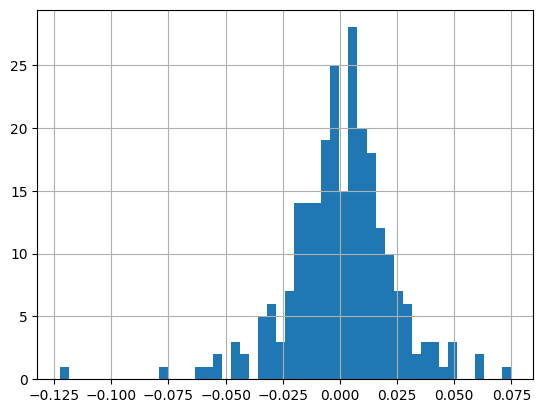

In [32]:
ford['returns'].hist(bins=50)

<Axes: >

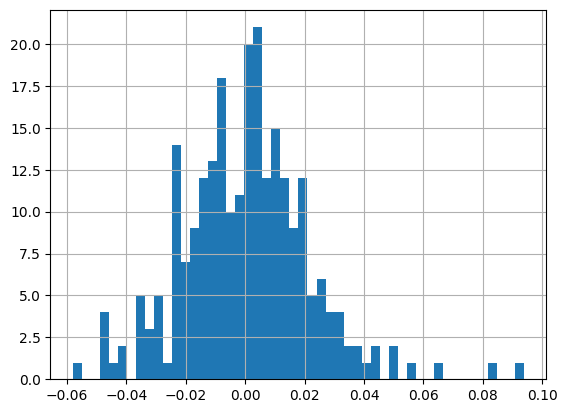

In [33]:
gm['returns'].hist(bins=50)

<Axes: >

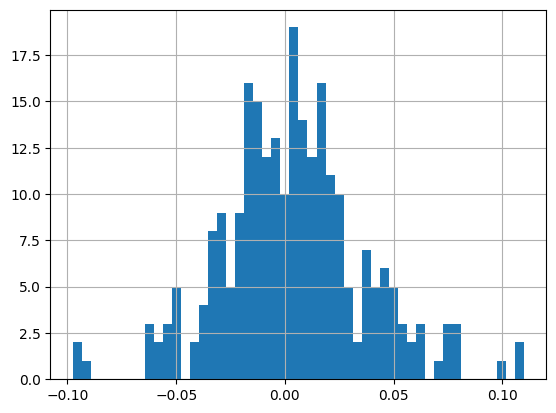

In [34]:
tesla['returns'].hist(bins=50)

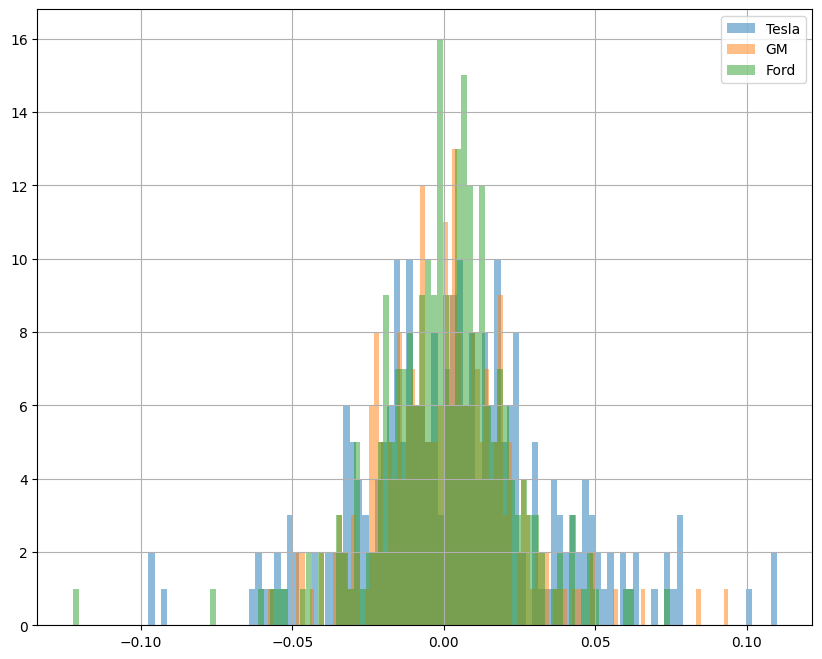

In [35]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.5)
gm['returns'].hist(bins=100,label='GM',alpha=0.5)
ford['returns'].hist(bins=100,label='Ford',alpha=0.5)
plt.legend()

** Try also plotting a KDE instead of histograms for another view point. Which stock has the widest plot? **

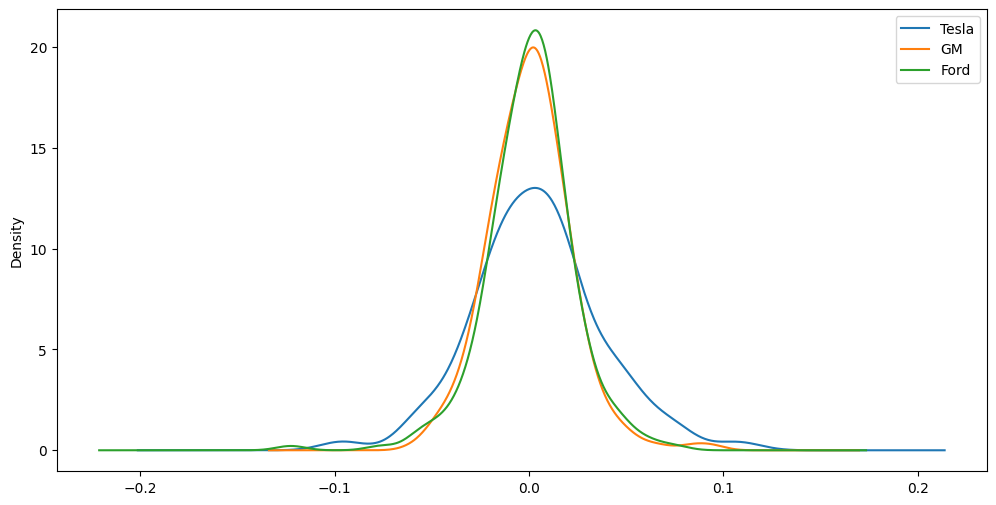

In [36]:
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(12,6))
gm['returns'].plot(kind='kde',label='GM')
ford['returns'].plot(kind='kde',label='Ford')
plt.legend()

** Try also creating some box plots comparing the returns. **

<Axes: >

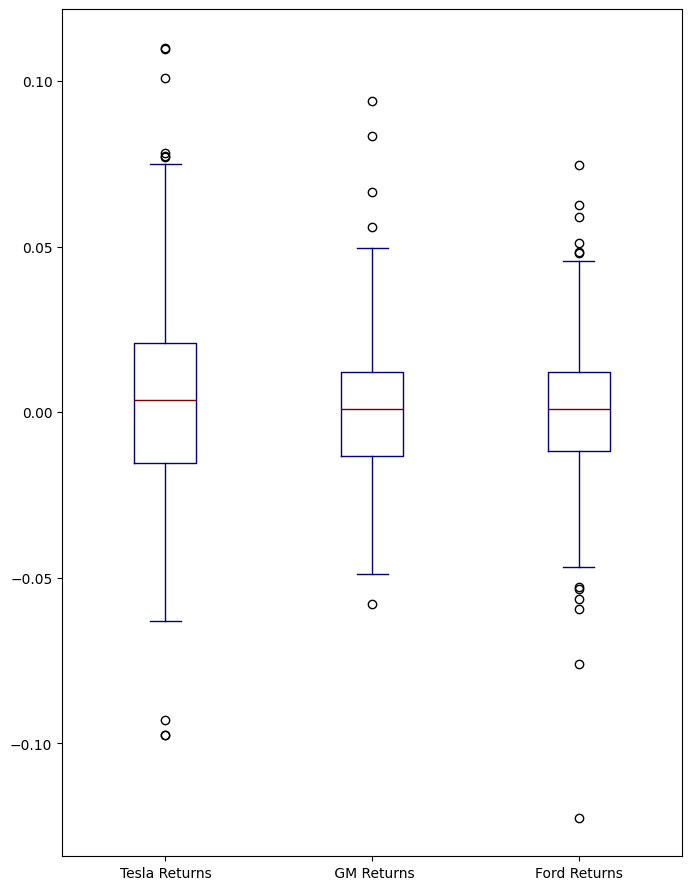

In [37]:
box_df = pd.concat([tesla['returns'],gm['returns'],ford['returns']],axis=1)
box_df.columns = ['Tesla Returns',' GM Returns','Ford Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

## Comparing Daily Returns between Stocks

** Create a scatter matrix plot to see the correlation between each of the stocks daily returns. This helps answer the questions of how related the car companies are. Is Tesla begin treated more as a technology company rather than a car company by the market?**

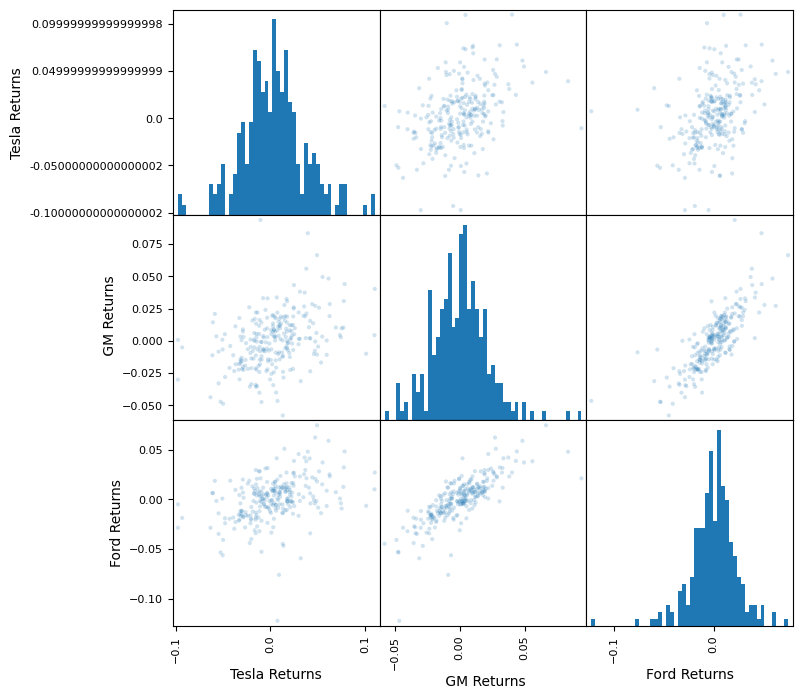

In [38]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

** It looks like Ford and GM do have some sort of possible relationship, let's plot just these two against eachother in scatter plot to view this more closely!**

<Axes: xlabel=' GM Returns', ylabel='Ford Returns'>

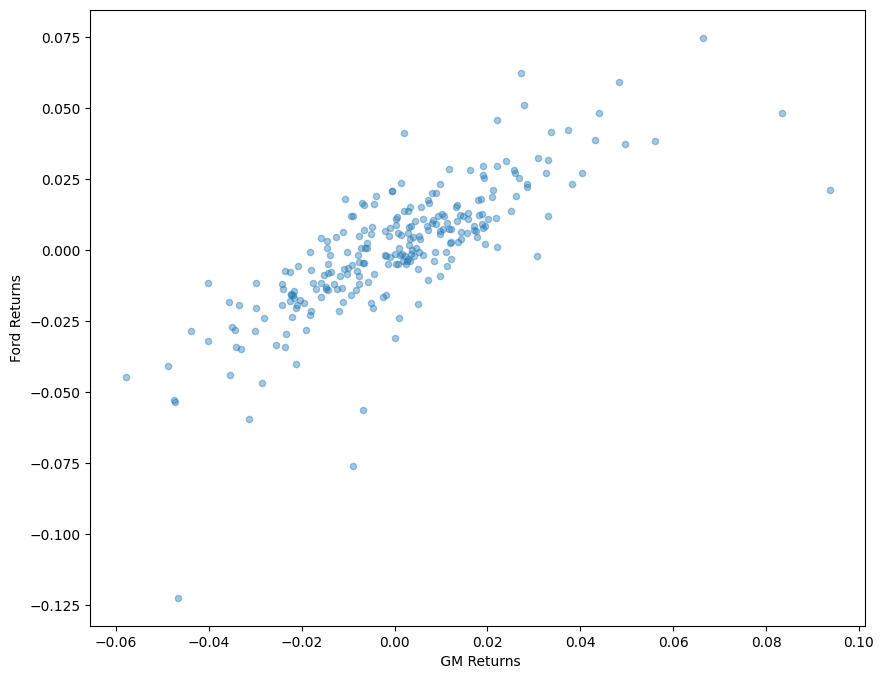

In [39]:
box_df.plot(kind='scatter',x=' GM Returns',y='Ford Returns',alpha=0.4,figsize=(10,8))

____
## Cumulative Daily Returns

Great! Now we can see which stock was the most wide ranging in daily returns (you should have realized it was Tesla, our original stock price plot should have also made that obvious).

With daily cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would is be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. Keep in mind, our simple calculation here won't take into account stocks that give back a dividend. Let's look at some simple examples:

Lets us say there is a stock 'ABC' that is being actively traded on an exchange. ABC has the following prices corresponding to the dates given

    Date                        Price
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**Daily Return** : Daily return is the profit/loss made by the stock compared to the previous day. (This is what ew just calculated above). A value above one indicates profit, similarly a value below one indicates loss. It is also expressed in percentage to convey the information better. (When expressed as percentage, if the value is above 0, the stock had give you profit else loss). So for the above example the daily returns would be

    Date                         Daily Return                  %Daily Return
    01/01/2018                 10/10 =  1                          -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%

**Cumulative Return**: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made.  If cumulative return is above one, you are making profits else you are in loss. So for the above example cumulative gains are as follows

    Date                       Cumulative Return         %Cumulative Return
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

** Create a cumulative daily return column for each car company's dataframe.**

In [40]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()

In [41]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800,2.741429e+10,NaN,NaN
2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000,1.968224e+10,0.051249,1.051249
2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300,1.745907e+10,-0.029039,1.020722
2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220911100,2.275384e+10,0.024651,1.045883
2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000,2.263618e+10,0.059349,1.107956


In [42]:
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

** Now plot the Cumulative Return columns against the time series index. Which stock showed the highest return for a $1 invested? Which showed the lowest?**

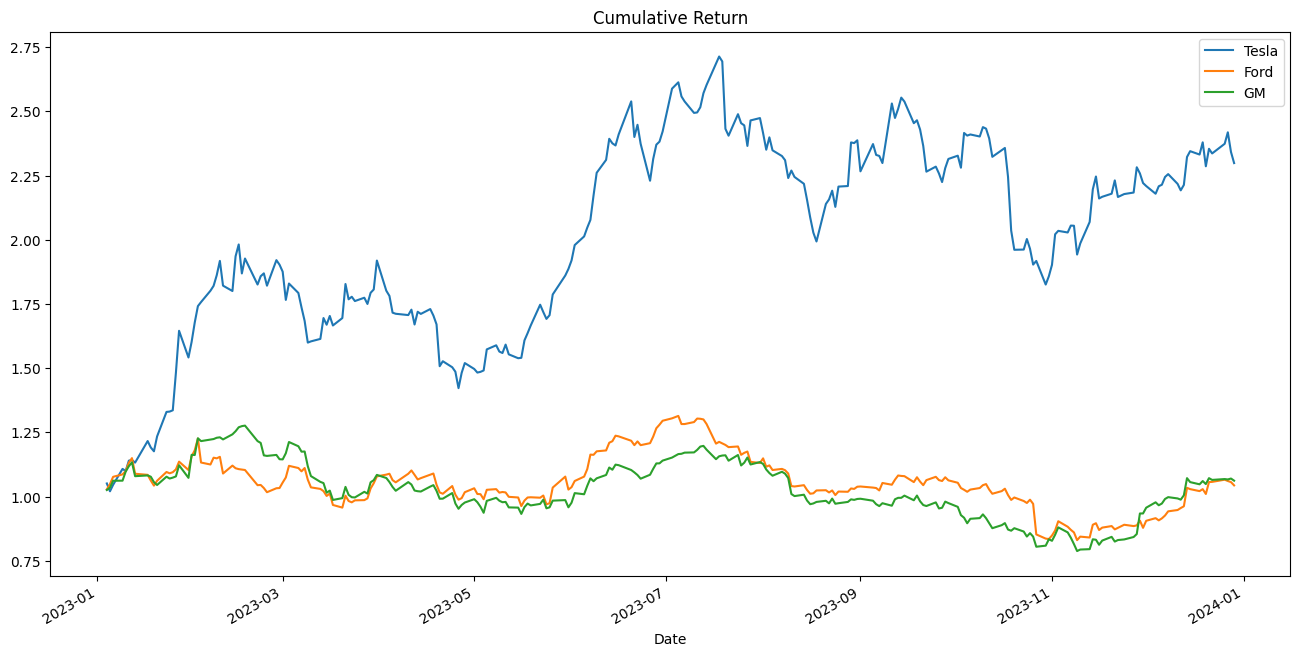

In [43]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend()